# Retorno sobre o investimento
Em finanças, retorno sobre o investimento (return on investment ou ROI), também chamado taxa de retorno (rate of return ou ROR), taxa de lucro ou simplesmente retorno, é a relação entre a quantidade de dinheiro ganho (ou perdido) como resultado de um investimento e a quantidade de dinheiro investido.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
apple = yf.download('AAPL', period='5y').dropna()
apple.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2019-11-01 00:00:00+00:00,61.885677,63.955002,63.982498,62.290001,62.384998,151125200
2019-11-04 00:00:00+00:00,62.292088,64.375000,64.462502,63.845001,64.332497,103272000
2019-11-05 00:00:00+00:00,62.202576,64.282501,64.547501,64.080002,64.262497,79897600
2019-11-06 00:00:00+00:00,62.229179,64.309998,64.372498,63.842499,64.192497,75864400
2019-11-07 00:00:00+00:00,62.947395,64.857498,65.087502,64.527496,64.684998,94940400


## Retorno Simples

O retorno simples mede a variação percentual no preço de um ativo de um dia para o próximo. Podemos calcular o retorno simples com a seguinte fórmula:

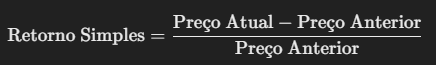

Em Python, faremos isso com o método pct_change():

In [3]:
apple['Retorno Simples'] = apple['Adj Close'].pct_change()
apple

Price,Adj Close,Close,High,Low,Open,Volume,Retorno Simples
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2019-11-01 00:00:00+00:00,61.885677,63.955002,63.982498,62.290001,62.384998,151125200,NaN
2019-11-04 00:00:00+00:00,62.292088,64.375000,64.462502,63.845001,64.332497,103272000,0.006567
2019-11-05 00:00:00+00:00,62.202576,64.282501,64.547501,64.080002,64.262497,79897600,-0.001437
2019-11-06 00:00:00+00:00,62.229179,64.309998,64.372498,63.842499,64.192497,75864400,0.000428
2019-11-07 00:00:00+00:00,62.947395,64.857498,65.087502,64.527496,64.684998,94940400,0.011541
...,...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,233.399994,233.399994,234.729996,232.550003,233.320007,36087100,0.008599
2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200,0.001157


In [4]:
apple[['Adj Close', 'Retorno Simples']].head()

Price,Adj Close,Retorno Simples
Ticker,AAPL,
Date,,
2019-11-01 00:00:00+00:00,61.885677,NaN
2019-11-04 00:00:00+00:00,62.292088,0.006567
2019-11-05 00:00:00+00:00,62.202576,-0.001437
2019-11-06 00:00:00+00:00,62.229179,0.000428
2019-11-07 00:00:00+00:00,62.947395,0.011541


## Retorno Logarítmo

O retorno logarítmico é uma alternativa ao retorno simples, especialmente útil em análises financeiras devido a suas propriedades aditivas. A fórmula para o retorno logarítmico é:

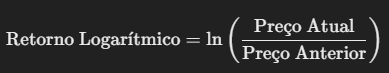

Podemos calcular o retorno logarítmico usando o NumPy:


In [5]:
apple['Retorno Logarítmico'] = np.log(apple['Adj Close'] / apple['Adj Close'].shift(1))

In [6]:
apple[['Adj Close', 'Retorno Logarítmico']].head()

Price,Adj Close,Retorno Logarítmico
Ticker,AAPL,
Date,,
2019-11-01 00:00:00+00:00,61.885677,NaN
2019-11-04 00:00:00+00:00,62.292088,0.006546
2019-11-05 00:00:00+00:00,62.202576,-0.001438
2019-11-06 00:00:00+00:00,62.229179,0.000428
2019-11-07 00:00:00+00:00,62.947395,0.011475


In [7]:
retorno_log = apple['Retorno Logarítmico'].sum()
retorno_log

1.2780640328729271

## Análise de Risco: Volatilidade

A volatilidade é uma medida de risco e representa a variação dos retornos ao longo do tempo. Ela é calculada como o desvio padrão dos retornos.

Vamos calcular a volatilidade diária e anualizada para o retorno simples.

In [8]:
volatilidade_diaria = apple['Retorno Simples'].std()
volatilidade_diaria

0.01995872380366998

In [9]:
# Calculando a volatilidade anualizada
volatilidade_anual = volatilidade_diaria * np.sqrt(252)
volatilidade_anual

0.31683491802441544

## Coeficiente de Variação

O coeficiente de variação (CV) é uma medida estatística que expressa o desvio padrão de um conjunto de dados em relação à sua média, permitindo comparar a dispersão de diferentes conjuntos de dados com unidades ou escalas distintas. É calculado como a razão entre o desvio padrão e a média e geralmente é expresso em porcentagem.

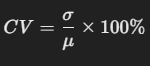

* Menor CV: Um CV baixo indica que os dados estão menos dispersos em torno da média, ou seja, os valores são mais consistentes.


* Maior CV: Um CV alto indica maior dispersão dos dados em torno da média, mostrando que os valores têm uma variabilidade maior.

In [10]:
# CV Anual
cv_anual = volatilidade_anual / retorno_log
cv_anual

0.2479022254559581

## Visualizando Retornos e Volatilidade

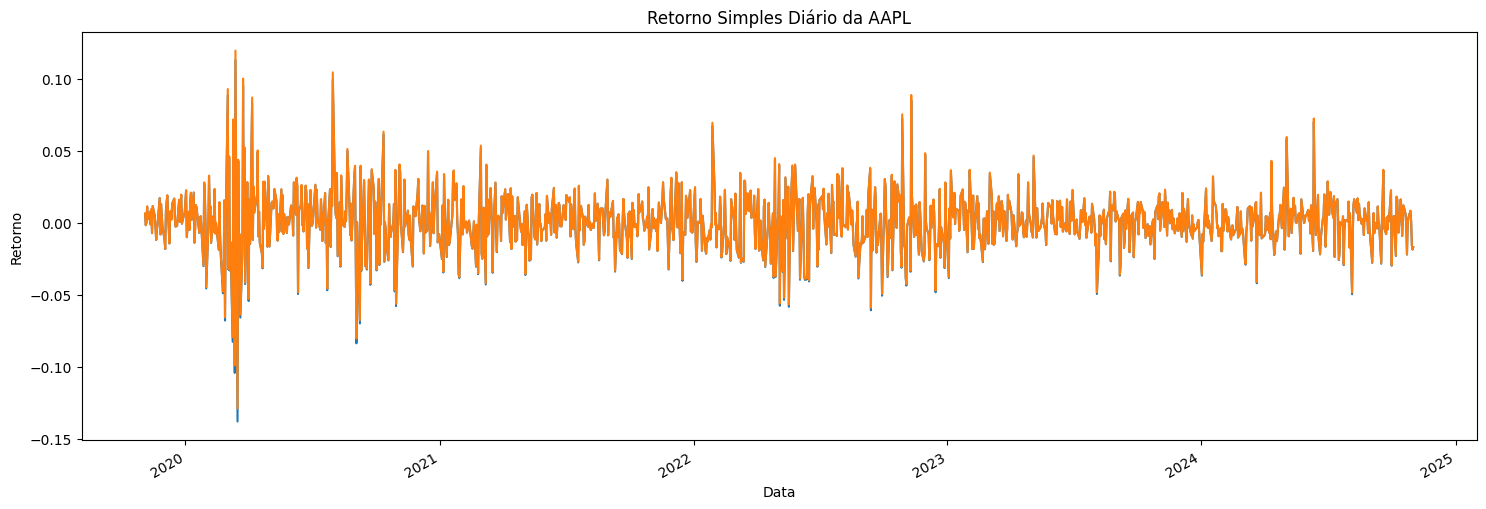

In [11]:
plt.figure(figsize=(18, 6))
apple['Retorno Logarítmico'].plot(title="Retorno LOG Diário da AAPL")
apple['Retorno Simples'].plot(title="Retorno Simples Diário da AAPL")
plt.ylabel("Retorno")
plt.xlabel("Data")
plt.show()

## Tipos de Risco

No mercado financeiro, existem diferentes tipos de risco. Aqui estão alguns dos principais:

**Risco Sistemático**: Refere-se ao risco associado ao mercado como um todo. Esse tipo de risco não pode ser eliminado por diversificação, pois é influenciado por fatores econômicos e políticos globais. A volatilidade é uma medida comum de risco sistemático.

**Risco Não Sistemático**: Refere-se ao risco específico de um ativo ou empresa. Esse tipo de risco pode ser reduzido por diversificação, pois é influenciado por fatores específicos de uma empresa, como problemas de gestão ou concorrência.


# Exercícios Práticos
Calcular o retorno simples e logarítmico para outras ações.

1.   Calcular o retorno simples e logarítmico para outras MSFT do ano passado.
2.   Comparar a volatilidade da MSFT.
3.   Calcular o coeficiente de volatilidade MSFT

In [12]:
# 1. Retornos MSFT
micro = yf.download('MSFT', period='1y')
micro

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2023-11-01 00:00:00+00:00,343.491730,346.070007,347.420013,339.649994,339.790009,28158800
2023-11-02 00:00:00+00:00,345.724976,348.320007,348.829987,344.769989,347.239990,24348100
2023-11-03 00:00:00+00:00,350.171600,352.799988,354.390015,347.329987,349.630005,23624000
2023-11-06 00:00:00+00:00,353.873779,356.529999,357.540009,353.350006,353.450012,23828300
2023-11-07 00:00:00+00:00,357.844025,360.529999,362.459991,357.630005,359.399994,25833900
...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,426.589996,426.589996,431.940002,426.299988,431.660004,14882400
2024-10-29 00:00:00+00:00,431.950012,431.950012,433.170013,425.799988,428.000000,17644100


In [13]:
micro['Retorno Simples'] = micro['Adj Close'].pct_change().dropna()
micro.head()

Price,Adj Close,Close,High,Low,Open,Volume,Retorno Simples
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,
Date,,,,,,,
2023-11-01 00:00:00+00:00,343.491730,346.070007,347.420013,339.649994,339.790009,28158800,NaN
2023-11-02 00:00:00+00:00,345.724976,348.320007,348.829987,344.769989,347.239990,24348100,0.006502
2023-11-03 00:00:00+00:00,350.171600,352.799988,354.390015,347.329987,349.630005,23624000,0.012862
2023-11-06 00:00:00+00:00,353.873779,356.529999,357.540009,353.350006,353.450012,23828300,0.010572
2023-11-07 00:00:00+00:00,357.844025,360.529999,362.459991,357.630005,359.399994,25833900,0.011219


In [14]:
micro['Retorno Logarítmo'] = np.log(micro['Adj Close'] / micro['Adj Close'].shift(1))
micro.head()

Price,Adj Close,Close,High,Low,Open,Volume,Retorno Simples,Retorno Logarítmo
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,,
Date,,,,,,,,
2023-11-01 00:00:00+00:00,343.491730,346.070007,347.420013,339.649994,339.790009,28158800,NaN,NaN
2023-11-02 00:00:00+00:00,345.724976,348.320007,348.829987,344.769989,347.239990,24348100,0.006502,0.006481
2023-11-03 00:00:00+00:00,350.171600,352.799988,354.390015,347.329987,349.630005,23624000,0.012862,0.012780
2023-11-06 00:00:00+00:00,353.873779,356.529999,357.540009,353.350006,353.450012,23828300,0.010572,0.010517
2023-11-07 00:00:00+00:00,357.844025,360.529999,362.459991,357.630005,359.399994,25833900,0.011219,0.011157


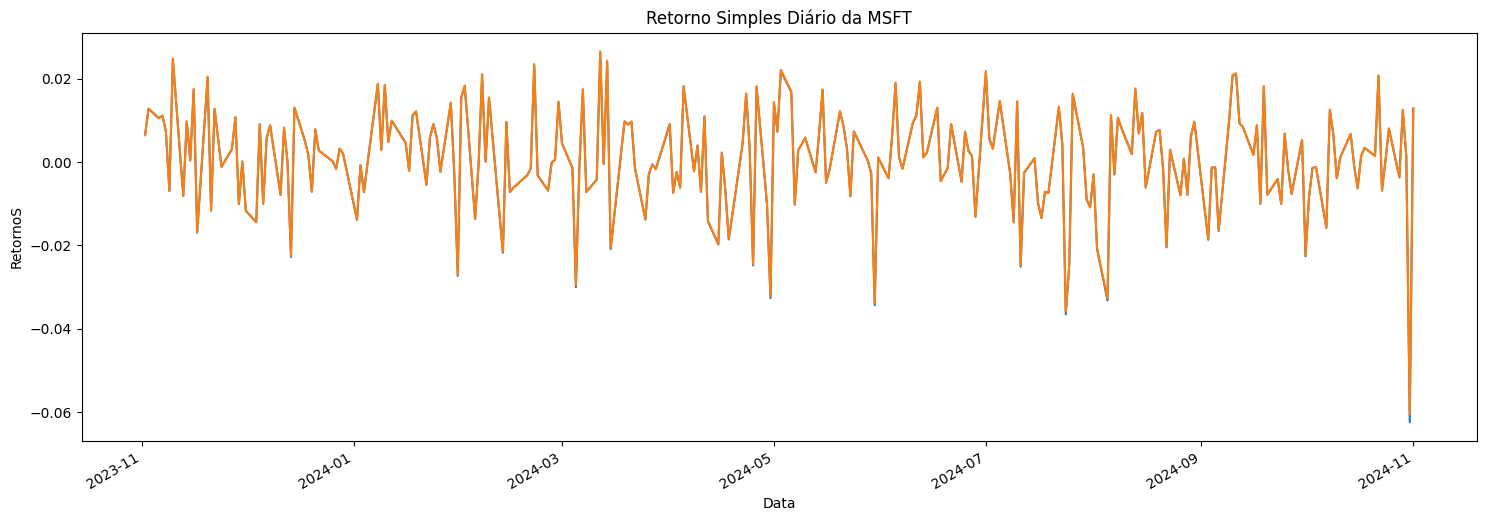

In [15]:
plt.figure(figsize=(18, 6))
micro['Retorno Logarítmo'].plot(title="Retorno LOG Diário da MSFT")
micro['Retorno Simples'].plot(title="Retorno Simples Diário da MSFT")
plt.ylabel("RetornoS")
plt.xlabel("Data")
plt.show()

In [16]:
# 2. Volatilidade
volatilidade_diaria_micro = micro['Retorno Logarítmo'].std()
volatilidade_diaria_micro

0.012431508735939475

In [17]:
volatilidade_anual_micro = volatilidade_diaria_micro * np.sqrt(252)
volatilidade_anual_micro

0.19734408321973668

In [25]:
retorno_log2 = micro['Retorno Logarítmo'].sum()
retorno_log2

0.18091322859552922

In [26]:
# 3. CV
cv_anual_micro = volatilidade_anual_micro / retorno_log2
cv_anual_micro

1.0908217422891844

# Análise de Carteira

In [18]:
# Definindo os tickers para a carteira
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']  # 5 ativos

# Baixando os dados dos ativos
dados = yf.download(tickers, start='2019-01-01', end='2024-01-01')['Adj Close'].dropna()

# Exibindo os primeiros dados
dados.head()


[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2019-01-02 00:00:00+00:00,37.750076,76.956497,52.603748,95.501328,20.674667
2019-01-03 00:00:00+00:00,33.989891,75.014000,51.146851,91.988037,20.024000
2019-01-04 00:00:00+00:00,35.440903,78.769501,53.770355,96.266319,21.179333
2019-01-07 00:00:00+00:00,35.362015,81.475502,53.663124,96.389091,22.330667
2019-01-08 00:00:00+00:00,36.036118,82.829002,54.134457,97.087975,22.356667


In [19]:
# Retorno Simples
retorno_simples = dados.pct_change()
print("Retorno Simples:")
print(retorno_simples.head())

# Retorno Logarítmico
retorno_logaritmico = np.log(dados / dados.shift(1))
print("Retorno Logarítmico:")
print(retorno_logaritmico.head())


Retorno Simples:
Ticker                         AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                                       
2019-01-02 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2019-01-03 00:00:00+00:00 -0.099607 -0.025241 -0.027696 -0.036788 -0.031472
2019-01-04 00:00:00+00:00  0.042690  0.050064  0.051294  0.046509  0.057697
2019-01-07 00:00:00+00:00 -0.002226  0.034353 -0.001994  0.001275  0.054361
2019-01-08 00:00:00+00:00  0.019063  0.016612  0.008783  0.007251  0.001164
Retorno Logarítmico:
Ticker                         AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                                       
2019-01-02 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2019-01-03 00:00:00+00:00 -0.104924 -0.025566 -0.028086 -0.037482 -0.031978
2019-01-04 00:00:00+00:00  0.041803  0.048851  0.050021  0.045460  0.056094
2019-01-07 00:00:00+00:00 -0.002228  0.033777 -0.0

In [20]:
# Volatilidade diária
volatilidade_diaria = retorno_simples.std()
print("Volatilidade Diária:")
print(volatilidade_diaria)

# Volatilidade anualizada
volatilidade_anual = volatilidade_diaria * np.sqrt(252)
print("Volatilidade Anualizada:")
print(volatilidade_anual)


Volatilidade Diária:
Ticker
AAPL     0.020306
AMZN     0.022187
GOOGL    0.020038
MSFT     0.019207
TSLA     0.040757
dtype: float64
Volatilidade Anualizada:
Ticker
AAPL     0.322346
AMZN     0.352214
GOOGL    0.318100
MSFT     0.304908
TSLA     0.647000
dtype: float64


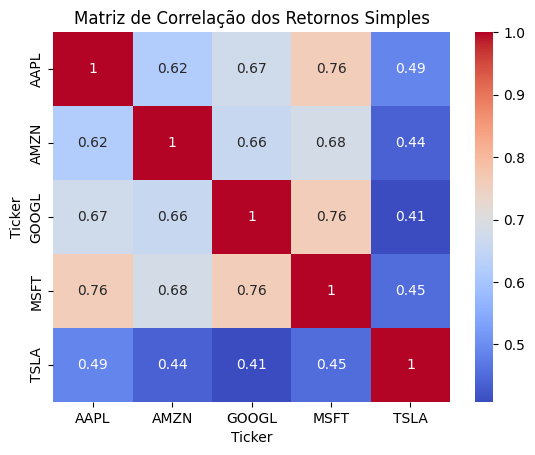

In [21]:
# Matriz de correlação dos retornos simples
import seaborn as sns
correlacao = retorno_simples.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação dos Retornos Simples")
plt.show()

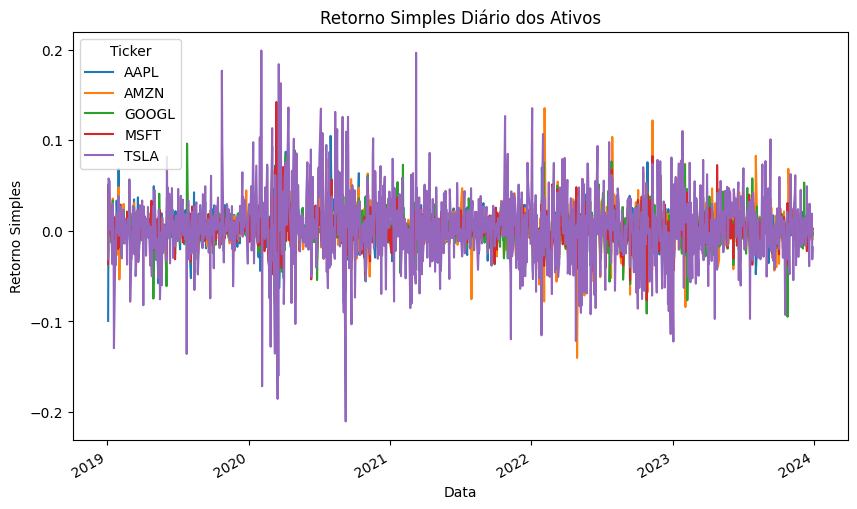

In [22]:
# Gráfico dos retornos simples
retorno_simples.plot(figsize=(10, 6), title="Retorno Simples Diário dos Ativos")
plt.ylabel("Retorno Simples")
plt.xlabel("Data")
plt.show()


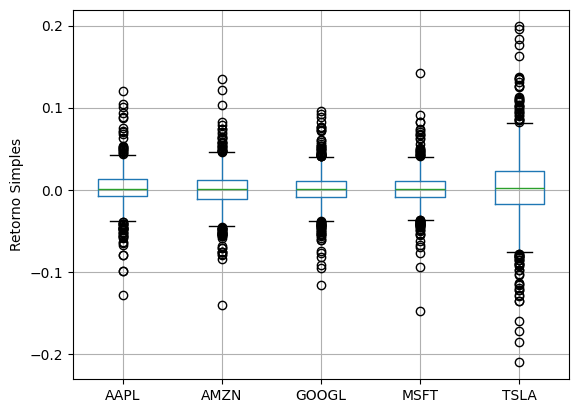

In [23]:
retorno_simples.boxplot()
plt.ylabel("Retorno Simples")
plt.show()